# <span style="color:Purple">Spatial Analysis for Transportation Safety: </span>
# <span>Supplementing Network Screening with Spatial Analysis in ArcGIS</span>

Author: Alberto Nieto, Esri

Version: 2

Last Changes: January 11, 2019 

## Abstract

Transportation safety continuously strives to answer the following question:

##### <span style="color:Navy">"Where does the transportation network contain road segments with systemic problems leading to harmful traffic accidents, and what should we do about it?"</span>

The AASHTO Highway Safety Manual (HSM) created by the Federal Highway Administration (FHWA) in partnership with State and Local transportation agencies helps organizations answer this question via a road safety management process that is characterized by four steps:

1. Network Screening
2. Diagnosis and Countermeasure Selection
3. Economic Appraisal and Prioritization
4. Safety Effectiveness Evaluation

Network Screening can be broadly defined the process for reviewing a transportation network to identify and rank sites from most likely to least likely to realize a reduction crash frequency with implementation of a countermeasure. 

Diagnosis and Countermeasure Selection broadly describes the process of analyzing and testing different countermeasure possibilities to find the right solution for the site. 

We propose that Spatial Analysis in ArcGIS can help supplement these two steps and that further evaluation in a future timeframe may help us also address Economic Appraisal and Prioritiziation and Safety Effectiveness Evaluation. The way in which Spatial Analysis is proposed as a contributing factor to the success of this program is with the following:

1. Spatial Analysis in ArcGIS can help the network screening step to "Establish Focus" by measuring geographic distributions of harmful traffic accident events and helping answer where and which traffic accidents are most prevalent in a study area. This process can be broadly accomplished through use of:
    1. Data visualization techniques to understand WHICH events are most frequent. 
    2. Density-based Clustering to understand WHERE these events are most dense spatially.
    3. Geographic distribution measurement techniques to understand and quanitify HOW significant each clustered pattern is in the study area. 

2. ArcGIS can help in the diagnostic and countermeasure selection process by helping visualize and communicate the concept of Countermeasure Modification Factors(CMF), with maps for each type of crash and the associated CMF value for each road segment.
    1. Map of CMF effectiveness by road.
        Ex: Load specific CMF (i.e. rumble strips), select specific type of crash, load segments 

Our proposal is not meant to replace or undermine the existing Network Screening and Countermeasure Selection procedures, but rather to provide an efficient and repeatable framework that can supplement these two steps with insights and further information extracted through spatial analysis. The application and further use of this framework is recommended and meant to be further refined in collaboration with federal, state, and local agencies through actual application.

## Methodology

The approach described in this notebook can be organized in a sequence of three steps:

1. Establish Focus for Network Screening via GIS Analysis
2. Network Screening
3. CMF Visualization and Exploration

## <span style="color:Navy">Step 1: </span><span> Establish Focus for Network Screening via GIS Analysis </span>

Spatial Analysis in ArcGIS can help the network screening step to "Establish Focus" by measuring geographic distributions of harmful traffic accident events and helping answer where and which traffic accidents are most prevalent in a study area. This process can be broadly accomplished through use of:
    1. Data visualization techniques to understand WHICH events are most frequent. 
    2. Density-based Clustering to understand WHERE these events are most dense spatially.
    3. Geographic distribution measurement techniques to understand and quanitify HOW significant each clustered pattern is in the study area. 

### Defining, Finding, and Describing Spatial Clusters of Accident Events

When considering the question of finding a "systemic problem" on the transportation network, a useful aspect to consider is the spatial distribution of problematic events, such as traffic accidents. A useful evaluation of what type of problem a state should focus on is the degree of clustering for each type of accident. The case is made that a cluster of traffic accident locations is highly suggestive of the presence of a systemic problem in the transportation network, and if a study area experiences stronger accidents of a certain type, then that type should be the focus of the rest of the HSM procedure.

##### Appendix: Density-based Clustering Approach

Spatial clusters in point data can be found via the Density-based Clustering tool in ArcGIS: a geoprocessing and web-service enabled tool that processes point data and designates each event as either part of a cluster or "noise". The tool can leverage three algorithms to determine the definition of a cluster and assignment logic: DBSCAN, HDBSCAN, and OPTICS. This approach evaluates each algorithm and attempts to set a starting baseline for an analysis framework that can be repeated for most states in the United States. Further elaboration on the definition and designation of clusters is recommended for local agencies and continued use of this approach. 

Finding clusters is only useful to help find potentially dangerous locations (given a specific definition of a cluster), and the approach recommends an additional step: spatial and non-spatial measurements of the characteristics of each cluster of accidents to help rank each site. To this end, the following descriptive measurements are recorded for each site:

#### Spatial:
- Calculating the average distance between features (nearest neighbor index)
- Counting the number of features within defined distances (Ripley's K-statistic)
- Overlaying areas of equal size (quadrant analysis)
- Cluster confidence (Density-based Clustering messaging)

#### Aspatial: 
- Cluster harm event homogeneity: How similar is the harm cause of all the accidents in the cluster? 
- Road segment characteristics
    - Road segment traffic volume
    - Road segment sinuosity
    - Road segment out-of-context curve
    - Road segment speed limit
    - Road segment guard
    - Road segment signage
- Temporal characteristics
    - Seasonality of events
    - Day of events
    - Time of events

### Data

The following datasets are used for a basic assessment of this workflow:

- **Fatal Accident Crash locations in Maryland (Federal):**
    - Source: NHTSA FARS
    - Extent: Maryland
    - Time: 2002 to 2016
    - Crash Type: Fatal accidents
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=89116fe5f52e429f9f2eaace87084739
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/FARS_Accidents_in_Maryland_2002_to_2016/FeatureServer


- **Accident Crash locations in Maryland (State):**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014
    - Crash Type: All types
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=89116fe5f52e429f9f2eaace87084739
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/FARS_Accidents_in_Maryland_2002_to_2016/FeatureServer


- **Roads: Maryland Interstate Polylines (HPMS AADT Segmentation)**
    - Source: FHWA Highway Performance Management System (HPMS)
    - Extent: Maryland
    - Time: 2016 AADT
    - Includes HPMS Polyline segments derived from AADT for Maryland
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=597913c0a2344684896e0c6d1e14040e
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Interstates_HPMS/FeatureServer
    

- **Roads: Maryland Interstate Points (0.1 Mile Segmentation)**
    - Source: FHWA Highway Performance Management System (HPMS) and ArcGIS geoprocessing
    - Extent: Maryland
    - Time: 2016 AADT
    - Includes HPMS point segments derived from AADT for Maryland with assigned crash rates from 2016 FARS.
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=af6515f1f1ed4ffaa6b5cda3e57aecdd
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/HPMS_Point_Segments_Maryland/FeatureServer


- **Analyzed Roads: All Maryland Roads**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014 AADT
    - Includes HSM/USRAP Crash Rate Risk outputs from Solution Template for all Maryland Roads
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=eafe5ab24b2747279b06c220125c4c22
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Crash_Rate_Risk/FeatureServer
    

- **Analyzed Roads: Maryland Interstates Result from Crash Analysis Solution**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014 AADT
    - Includes HSM/USRAP Crash Rate Risk outputs from Solution Template for _just Maryland Interstates_.
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=eafe5ab24b2747279b06c220125c4c22
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Crash_Rate_Risk/FeatureServer
    
    
- **Crash Modification Factors Listings**
    - Source: http://www.cmfclearinghouse.org/index.cfm
    - Extent: Non-spatial data, but applicable to United States
    - Time: Non-temporal data
    - Includes Crash Modification Factor (CMF) listings for safety countermeasures that have been studied. 
    - Item location: '/../data/cmf_listings.xls'
    
    
- **Crash Costs Summary Table**
    - Source: http://www.cmfclearinghouse.org/collateral/ServiceLife_and_CrashCostUserGuide/Crash%20Cost%20Summary%20Table.xlsx
    - Extent: Non-spatial data, but applicable to United States
    - Time: Non-temporal data
    - Includes associated costs with traffic accidents of different types for each state based on studies. 
    - Item location: '/../data/CrashCosts_FHWA.xlsx'

The following code cells in this notebook are used to retrieve, examine, and confirm the availability of each dataset. 

### Preliminary Setup

This segment of the notebook contains python code that accesses the needed modules and functions to perform our analysis. Any supplemental custom functions that are used in this process, such as a function to quickly plot a map and histogram, are also created and stored in this section.

#### Import the needed modules, including ArcPy, the ArcGIS API for Python, and other useful modules

In [1]:
import arcpy
arcpy.env.overwriteOutput = True
import arcgis
from arcgis import features
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geoenrichment import *
from arcgis.geometry import project
from arcgis.mapping import WebMap
import os
import time
from IPython.display import display

In [2]:
# Imports for plotting in Bokeh
import numpy as np
import bokeh
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
from bokeh.models import Legend, Range1d
from bokeh.embed import file_html
from bokeh.resources import CDN
# from bokeh.charts import Bar, Histogram, output_file, show  # For bar, histogram charts
# Set bokeh to output plots in the notebook
output_notebook()

Loading BokehJS ...

In [3]:
# gis = arcgis.gis.GIS("home", verify_cert=False)
gis = arcgis.gis.GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal", verify_cert=False)

Enter password: ········


In [33]:
# Set and Change directory to workspace
workspace_dir = r"D:\3_Sandbox_Projects\1903_HSM_Analysis\workspace"
data_dir = r"D:\3_Sandbox_Projects\1903_HSM_Analysis\data"

arcpy.env.overwriteOutput = True
# Create a temporary file geodatabase on disk
if arcpy.Exists(os.path.join(workspace_dir, "maryland_analysis.gdb")):
    workspace_fgdb = os.path.join(workspace_dir, "maryland_analysis.gdb")
else:
    workspace_fgdb = arcpy.CreateFileGDB_management(workspace_dir, "maryland_analysis").getOutput(0)

In [34]:
# Create a helper function that receives a spatially-enabled dataframe and column as input, and returns a map widget, symbolized layer, and bokeh histogram using the layer's colormap
def create_map_and_histogram(map_location, sdf, column, method='esriClassifyNaturalBreaks', class_count=5, cmap='OrRd', alpha=0.8, plot_height=600, plot_width=600):
    """
    create_map_and_histogram
    inputs:
        map_location: Location for the map widget. The entry will be geocoded and used as the starting extent for the map widget. Example: "Pittsburgh"
        sdf: spatially-enabled dataframe that is plotted on a map and histogram
        column: column to use for layer symbology and histogram
    return: map widget, bokeh plot
    """
    
    # Create map
    map_obj = gis.map(map_location)
    sdf.spatial.plot(map_widget=map_obj, renderer_type='c', method=method, class_count=class_count, col=column, cmap=cmap, alpha=0.8)  
    
    # Extract the layer's class breaks and colors
    class_breaks = map_obj.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
    cbs_list = []
    cmap_list = []
    for cb in class_breaks:
        cbs_list.append(cb.classMaxValue)
        cmap_list.append('#%02x%02x%02x' % (cb.symbol.color[0], cb.symbol.color[1], cb.symbol.color[2]))
    
    # Create a histogram of salesvol values
    hist, edges = np.histogram(sdf[column],
                              bins=class_count)

    # Put the information in a dataframe
    hist_df = pd.DataFrame({column: hist,
                            'left': edges[:-1],
                            'right': edges[1:]})
    
    # Add colors to each hist_df record
    hist_df['color'] = pd.Series(cmap_list)

    # Create the blank plot
    p = figure(plot_height = plot_height, plot_width = plot_width, 
               title = 'Histogram',
               y_axis_label = 'Feature Count',
               x_axis_label = column)

    # Add a quad glyph
    p.quad(bottom=0, top=hist_df[column], 
           left=hist_df['left'], right=hist_df['right'],
           line_color='white', fill_color=hist_df['color'])

    # Return outputs
    return map_obj, p

### Data Retrieval

#### Crash Data:

<Item title:"Traffic Accidents in Maryland 2002 to 2016" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
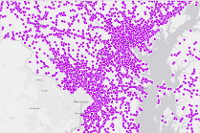

In [6]:
crashes_fars_item = gis.content.search("Traffic Accidents in Maryland 2002 to 2016", item_type="Feature Service")[0]
crashes_fars_item

<Item title:"Maryland Crash Locations" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
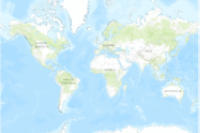

In [7]:
crashes_maryland_item = gis.content.search("Maryland Crash Locations", item_type="Feature Service")[0]
crashes_maryland_item

#### Roadway Data:

<Item title:"Maryland_Interstates_HPMS" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
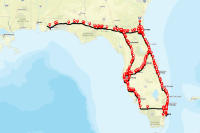

In [8]:
roads_maryland_interstate_polylines_item = gis.content.search("Maryland_Interstates_HPMS", item_type="Feature Service")[-1]
roads_maryland_interstate_polylines_item

<Item title:"HPMS_Point_Segments_Maryland" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
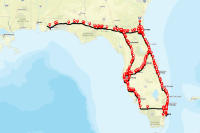

In [9]:
roads_maryland_interstate_points_item = gis.content.search("HPMS_Point_Segments_Maryland", item_type="Feature Service")[0]
roads_maryland_interstate_points_item

<Item title:"Maryland Roads with Crash Rate Risk" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
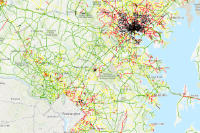

In [10]:
analysisroads_allmd_item = gis.content.search("Maryland Roads with Crash Rate Risk", item_type="Feature Service")[0]
analysisroads_allmd_item

<Item title:"Maryland Interstates with Crash Rate Risk" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
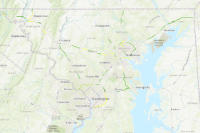

In [11]:
analysisroads_interstatesmd_item = gis.content.search("Maryland Interstates with Crash Rate Risk", item_type="Feature Service")[0]
analysisroads_interstatesmd_item

#### Crashes Dataset

In [12]:
# Convert the items into spatially-enabled dataframes
crashes_fars_sedf = pd.DataFrame.spatial.from_layer(crashes_fars_item.layers[0])
crashes_fars_sedf.head()

,ALIGNMNT,ARR_HOUR,ARR_MIN,A_CRAINJ,A_CT,A_D15_19,A_D15_20,A_D16_19,A_D16_20,A_D16_24,...,WEATHER,WEATHER1,WEATHER2,WRK_ZONE,X,X_Y_VALID,Y,YEAR,YEAR_TEXT,latitude
0,1,99,99,1,3,2,2,2,2,1,...,2,0,0,0,-76.110964,1,39.578481,2003,2003,39.578481
1,1,99,99,1,1,2,2,2,2,2,...,2,0,0,0,-76.286486,1,39.466642,2003,2003,39.466642
2,1,99,99,1,1,2,2,2,2,2,...,1,0,0,0,-77.166225,1,39.359514,2003,2003,39.359514
3,2,99,99,1,1,2,2,2,2,1,...,9,0,0,0,-76.639047,1,39.546289,2003,2003,39.546289
4,1,99,99,1,1,1,1,1,1,1,...,2,0,0,0,-76.807358,1,38.898033,2003,2003,38.898033


In [13]:
crashes_fars_sedf.shape

(7734, 115)

Here's the basic view and shape (number of rows and columns) of our table. The table has several columns (115), so let's investigate the columns in the data a bit closer and keep only the ones we need to answer our question:

In [14]:
crashes_fars_sedf.columns.tolist()

['ALIGNMNT',
 'ARR_HOUR',
 'ARR_MIN',
 'A_CRAINJ',
 'A_CT',
 'A_D15_19',
 'A_D15_20',
 'A_D16_19',
 'A_D16_20',
 'A_D16_24',
 'A_D21_24',
 'A_D65PLS',
 'A_DIST',
 'A_DOW',
 'A_DROWSY',
 'A_HR',
 'A_INTER',
 'A_INTSEC',
 'A_JUNC',
 'A_LT',
 'A_MANCOL',
 'A_MC',
 'A_PED',
 'A_PEDAL',
 'A_PEDAL_F',
 'A_PED_F',
 'A_POLPUR',
 'A_POSBAC',
 'A_RD',
 'A_REGION',
 'A_RELRD',
 'A_ROADFC',
 'A_ROLL',
 'A_RU',
 'A_SPCRA',
 'A_TOD',
 'BIA',
 'CF1',
 'CF2',
 'CF3',
 'CITY',
 'COUNTY',
 'C_M_ZONE',
 'DATE',
 'DATETIME',
 'DATETIME_2',
 'DAY',
 'DAY_TEXT',
 'DAY_WEEK',
 'DRUNK_DR',
 'FATALS',
 'FUNC_SYS',
 'HARM_EV',
 'HIT_RUN',
 'HOSP_HR',
 'HOSP_MN',
 'HOUR',
 'HOUR_TEXT',
 'INDIAN_RES',
 'LGT_COND',
 'LONGITUDE',
 'MAN_COLL',
 'MILEPT',
 'MINUTE',
 'MINUTE_TEXT',
 'MONTH',
 'MONTH_TEXT',
 'NHS',
 'NOT_HOUR',
 'NOT_MIN',
 'NO_LANES',
 'OBJECTID',
 'PAVE_TYP',
 'PEDS',
 'PERMVIT',
 'PERNOTMVIT',
 'PERSONS',
 'PROFILE',
 'PVH_INVL',
 'RAIL',
 'RD_OWNER',
 'RELJCT1',
 'RELJCT2',
 'REL_JUNC',
 'REL_ROAD

FARS Documentation: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812602

The full allotment of attributes in this table will be useful for several workflows, but for the purposes of this exercise, let's consider which aspects of the crash data we actually need: 

In [15]:
needed_fields = [
    "SHAPE",
    "STATE",
    "COUNTY",
    "PERSONS",
    "PEDS",
    "ROAD_FNC",
    "HARM_EV", 
    "MAN_COLL", # Manner of collision (i.e. rear-end)
    "REL_ROAD", # Relation to road (i.e. On roadway, shoulder)
    "LGT_COND", # Light condition (i.e. Daylight, dark)
    "WEATHER", 
    "WEATHER1",
    "WEATHER2",
    "WRK_ZONE",
    "FATALS",
    "DAY_WEEK",
    "DRUNK_DR",
    "TWAY_ID",
    "RAIL",
    "latitude",
    "LONGITUDE",
    "A_RU", # Land use (i.e. Rural/Urban)
    "A_RD", # Involving a roadway departure
    "A_CT", # Crash type
    "A_LT", # Involving a large truck
    "A_MC", # Involving a motorcycle
    "A_SPCRA", # Involving speeding
    "A_PED", # Involving a pedestrian
    "A_PEDAL", # Involving a pedalcyclist
    "A_ROLL", # Involving a rollover
    "A_POLPUR", # Involving a police pursuit
    "A_POSBAC", # Involving a driver with a positive BAC test result
    "A_D15_19", # Crashes Involving a Young Driver (Aged 15-19)
    "A_D15_20", # Crashes Involving a Young Driver (Aged 15-20)
    "A_D16_19", # Crashes Involving a Young Driver (Aged 16-19)
    "A_D16_20", # Crashes Involving a Young Driver (Aged 16-20)
    "A_D16_24", # Crashes Involving a Young Driver (Aged 16-24)
    "A_D21_24", # Crashes Involving a Young Driver (Aged 21-24)
    "A_D65PLS", # Crashes Involving an Older Driver (Aged 65+)
    "A_DIST", # Involving a distracted driver
    "A_DROWSY", # Involving a drowsy driver
    "YEAR_TEXT",
    "MONTH_TEXT",
    "DAY_TEXT",
    "HOUR_TEXT",
    "MINUTE_TEXT",
    "DATE",
    "DATETIME_2",
]

In [16]:
# Select our data by the list of columns we need
crashes_fars_sedf = crashes_fars_sedf[needed_fields]
crashes_fars_sedf.shape

(7734, 48)

We've parsed the data down to 47 columns. That helps us work with a smaller set of information for each crash. If we need to bring additional information on a future analysis, we simply need to add the corresponding attribute to the "needed_fields" list on the code cell above. 

We also need to query the records in this dataset for accidents that occurred on interstates between 2010 and 2014. The reason we're focusing on 2010 through 2014 is because we have a readily-available dataset of roads in Maryland with accurate traffic counts between 2010 and 2014 from the "Crash Analysis" solution template in ArcGIS, and we want to compare how the two proposed analyses workflows can supplement the existing approach. 

In [17]:
# Query for FARS crashes on Maryland interstates between 2010 and 2014
query = (crashes_fars_sedf.YEAR_TEXT.isin(["2010", "2011", "2012", "2013", "2014"]))
crashes_q_sedf = crashes_fars_sedf[query]
crashes_q_sedf.shape

(2227, 48)

We are left with 2,227 fatal accidents in Maryland roadways between 2010 and 2014. Let's quickly confirm by plotting these on a map along with the Maryland roadways.

### Map Data Visualization

In [22]:
verif_map = gis.map("Maryland")
verif_map.basemap = 'gray'
verif_map

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
# verif_map.add_layer(roads_maryland_interstate_polylines_item)
crashes_fars_sedf.spatial.plot(map_widget=verif_map)

True

In [20]:
# verif_map.add_layer(roads_maryland_interstate_polylines_item)
crashes_q_sedf.spatial.plot(map_widget=verif_map)

C:\ProgramData\Anaconda3\lib\site-packages\arcgis\features\geo\_accessor.py:2161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._data['OBJECTID'] = list(range(1, self._data.shape[0] + 1))


True

### Data visualization techniques to understand WHICH events are most frequent:

The FHWA Network Screening process works. What we need to help with is with understanding which type of crash event matters for each study area. Since we're working with Maryland data, we need to understand which type of crash event is most significant in Maryland. 

To start, let's explore using tables, charts, and graphs. 

#### Tabular Data Visualization

To explore the tabular aspects of this dataset, we'll use a python module called Pandas, and a data object called a dataframe. Dataframes are very efficient ways to store and perform calculations on tabular data inside python. To maintain the spatial aspects of the dataframe, we'll use the concept of a spatially-enabled dataframe, which allows spatial operations and easy plotting on maps (using the Arcpy spatial engine if possible)

In [24]:
# crashes_q_sedf
crashes_fars_sedf

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_D65PLS,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,2,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00
5,"{""x"": -8552033.298119813, ""y"": 4737310.0863507...",24,3,1,0,15,30,0,6,1,...,1,2,2,2003,1,5,15,14,2003-01-05,2003-01-05 15:14:00
6,"{""x"": -8653619.445634957, ""y"": 4817839.6967406...",24,43,1,0,11,42,0,6,1,...,2,1,2,2003,1,5,10,42,2003-01-05,2003-01-05 10:42:00
7,"{""x"": -8376862.803109456, ""y"": 4640047.3917500...",24,47,2,0,4,12,5,1,1,...,2,1,2,2003,1,8,5,8,2003-01-08,2003-01-08 05:08:00
8,"{""x"": -8537364.172214208, ""y"": 4737427.2482956...",24,3,2,1,13,9,0,2,1,...,2,1,2,2003,1,9,13,36,2003-01-09,2003-01-09 13:36:00
9,"{""x"": -8485530.10705329, ""y"": 4789946.25482263...",24,25,2,1,3,8,0,1,2,...,2,2,2,2003,1,11,2,0,2003-01-11,2003-01-11 02:00:00


One of the columns in this data, 'HARM_EV', contains the cause of the fatal accident, but it contains coded values that are difficult to immediately interpret. Let's use the [metadata documentation](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812602) and a python dictionary to make a data crosswalk that can help us easily interpret the causes of these accidents.

In [25]:
harm_ev_lookup_dict = {
    "1": "Rollover/Overturn",
    "2": "Fire/Explosion",
    "3": "Immersion",
    "4": "Gas Inhalation",
    "5": "Fell/Jumped from Vehicle",
    "6": "Injured in Vehicle",
    "7": "Other Non-Collision",
    "8": "Pedestrian",
    "9": "Pedalcyclist",
    "10": "Railway Vehicle",
    "11": "Live Animal",
    "12": "Motor Vehicle in Transport",
    "13": "Motor Vehicle in Transport on Other Roadway",
    "14": "Parked Motor Vehicle (Not in Transport)",
    "15": "Non-Motorist on Personal Conveyance",
    "16": "Thrown or Falling Object",
    "17": "Boulder",
    "18": "Other Object (Not Fixed)",
    "19": "Building",
    "20": "Impact Attenuator/Crash Cushion",
    "21": "Bridge Pier or Support",
    "22": "Bridge Parapet End",
    "23": "Bridge Rail",
    "24": "Guardrail Face",
    "25": "Concrete Traffic Barrier",
    "26": "Other Traffic Barrier",
    "27": "Highway/Traffic Sign Post",
    "28": "Overhead Sign Support/Sign",
    "29": "Luminary/Light Support",
    "30": "Utility Pole/Light Support",
    "31": "Post, Pole, or Other Supports",
    "32": "Culvert",
    "33": "Curb",
    "34": "Ditch",
    "35": "Embankment",
    "36": "Embankment - Rock, Stone, or Concrete",
    "37": "Embankment - Material Type Unknown",
    "38": "Fence",
    "39": "Wall",
    "40": "Fire Hydrant",
    "41": "Shrubbery",
    "42": "Tree (Standing Only)",
    "43": "Other Fixed Object",
    "44": "Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",
    "45": "Working Motor Vehicle",
    "46": "Traffic Signal Support",
    "47": "Vehicle Occupant Struck or Run Over by Own Vehicle",
    "48": "Snow Bank",
    "49": "Ridden Animal or Animal-Drawn Conveyance",
    "50": "Bridge Overhead Structure",
    "51": "Jackknife",
    "52": "Guardrail End",
    "53": "Mail Box",
    "54": "Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle In-Transport",
    "55": "Motor Vehicle in Motion Outside the Trafficway",
    "57": "Cable Barrier",
    "58": "Ground",
    "59": "Traffic Sign Support",
    "72": "Cargo/Equipment Loss or Shift (Harmful to This Vehicle)",
    "73": "Object Had Fallen From Motor Vehicle In-Transport",
    "74": "Road Vehicle on Rails",
    "91": "Unknown Object Not Fixed",
    "93": "Unknown Fixed Object",
    "98": "Not Reported (2010 Only)",
    "99": "Unknown"
}

In [26]:
def get_crash_cause_text(code):
    if not isinstance(code, str):
        code = str(code)
    if code not in harm_ev_lookup_dict:
        return "Unknown (Code: {0})".format(str(code))
    return harm_ev_lookup_dict[code]

In [27]:
crashes_fars_sedf

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_D65PLS,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,2,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00
5,"{""x"": -8552033.298119813, ""y"": 4737310.0863507...",24,3,1,0,15,30,0,6,1,...,1,2,2,2003,1,5,15,14,2003-01-05,2003-01-05 15:14:00
6,"{""x"": -8653619.445634957, ""y"": 4817839.6967406...",24,43,1,0,11,42,0,6,1,...,2,1,2,2003,1,5,10,42,2003-01-05,2003-01-05 10:42:00
7,"{""x"": -8376862.803109456, ""y"": 4640047.3917500...",24,47,2,0,4,12,5,1,1,...,2,1,2,2003,1,8,5,8,2003-01-08,2003-01-08 05:08:00
8,"{""x"": -8537364.172214208, ""y"": 4737427.2482956...",24,3,2,1,13,9,0,2,1,...,2,1,2,2003,1,9,13,36,2003-01-09,2003-01-09 13:36:00
9,"{""x"": -8485530.10705329, ""y"": 4789946.25482263...",24,25,2,1,3,8,0,1,2,...,2,2,2,2003,1,11,2,0,2003-01-11,2003-01-11 02:00:00


In [28]:
# crashes_q_sedf['Cause'] = crashes_q_sedf.apply(lambda x: get_crash_cause_text(x['HARM_EV']), axis=1)
crashes_fars_sedf['Cause'] = crashes_fars_sedf.apply(lambda x: get_crash_cause_text(x['HARM_EV']), axis=1)

In [29]:
crashes_fars_sedf

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2,Cause
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00,Motor Vehicle in Transport
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00,Pedestrian
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00,Embankment - Material Type Unknown
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00,Ditch
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00,Rollover/Overturn
5,"{""x"": -8552033.298119813, ""y"": 4737310.0863507...",24,3,1,0,15,30,0,6,1,...,2,2,2003,1,5,15,14,2003-01-05,2003-01-05 15:14:00,Utility Pole/Light Support
6,"{""x"": -8653619.445634957, ""y"": 4817839.6967406...",24,43,1,0,11,42,0,6,1,...,1,2,2003,1,5,10,42,2003-01-05,2003-01-05 10:42:00,Tree (Standing Only)
7,"{""x"": -8376862.803109456, ""y"": 4640047.3917500...",24,47,2,0,4,12,5,1,1,...,1,2,2003,1,8,5,8,2003-01-08,2003-01-08 05:08:00,Motor Vehicle in Transport
8,"{""x"": -8537364.172214208, ""y"": 4737427.2482956...",24,3,2,1,13,9,0,2,1,...,1,2,2003,1,9,13,36,2003-01-09,2003-01-09 13:36:00,Pedalcyclist
9,"{""x"": -8485530.10705329, ""y"": 4789946.25482263...",24,25,2,1,3,8,0,1,2,...,2,2,2003,1,11,2,0,2003-01-11,2003-01-11 02:00:00,Pedestrian


## <span style="color:Navy">Step 1: </span><span> Establish Focus </span>

### Hypothesis Test 1: Should Maryland spend money on roadway safety countermeasures?

Default Action (commit to doing if we stay ignorant): Don't spend money on road safety countermeasures in Maryland. 

Alternate Action: Spend money on road safety countermeasures in Maryland.

Null Hypothesis (H0): Crashes in Maryland are not dispersed and occur due to random occurrences. 

Alternative Hypothesis (H1): Crashes in Maryland are clustered and occur due to systemic problems. 

### TODO #1: Density-based Clustering by crash type to separate input accident locations into clusters and noise. 

Data: FARS 2002 to 2016 Maryland

### TODO #2: Directional Distribution by crash type to measure intensity of clustering

Data: Output from TODO #1

### TODO #3: Determine which crash types had most intense spatial clustering

Data: Outputs from TODO #2

## <span style="color:Navy">Step 2: </span><span> Network Screening (Highway Safety Manual / usRAP) </span>

Traditional Network Screening as described by the HSM can be peformed in GIS. A complete example of this workflow is described in the "Crash Analysis" solution template: https://solutions.arcgis.com/state-government/help/crash-analysis/. 

### TODO #4: Take top crash type from TODO #3 list and run data prep (segment roads to 1mile, assign crashes, calculate crash rate)

Data:
- Maryland road segments from Crash Analysis solution
- FARS 2010 to 2014 for Maryland

### TODO #5: Use multivariate clustering to group all road segments into similar road types. 

Data: Output road segments with crash rates from TODO #4

### TODO #6: For each multivariate clustering group, create the crash count chart (crash count by AADT)

Data: Outputs from TODO #5 with crash count, AADT, and crash rate from TODO #4

### TODO #7: Add SPF regression line and confidence intervals (level 1, 2, 3, 4 from MDT video)

Data: TBD

### TODO #8: Select the road segments in level 1 and designate these as high priority safety measurement segments

Output from TODO #7

## <span style="color:Navy">Step 3: </span><span>Diagnose and Solve</span>

### TODO #9: Build GIS or Python dataset of CMFs

Data: CMF excel from CMF Clearinghouse

### TODO #10: For each multivariate clustering group, determine which CMFs are applicable

Data: Output from TODO #5 and TODO #9

Output: Lookup table for each multivariate group and CMFs available

### TODO #11: For each segment, assign safety measure based on CMF totals. 

### TODO #12: Assign cost to crashes for each segment and calculate cost savings for each segment

### TODO #13: Create final map of problem segments, assigned safety measure, and cost savings

# DEV ZONE START

## <span style="color:Navy">Step 1: </span><span> Establish Focus </span>

### Hypothesis Test 1: Should Maryland spend money on roadway safety countermeasures?

Default Action (commit to doing if we stay ignorant): Don't spend money on road safety countermeasures in Maryland. 

Alternate Action: Spend money on road safety countermeasures in Maryland.

Null Hypothesis (H0): Crashes in Maryland are not dispersed and occur due to random occurrences. 

Alternative Hypothesis (H1): Crashes in Maryland are clustered and occur due to systemic problems. 

### TODO #1: Density-based Clustering by crash type to separate input accident locations into clusters and noise. 

Data: FARS 2002 to 2016 Maryland

### TODO #2: Directional Distribution by crash type to measure intensity of clustering

Data: Output from TODO #1

In [35]:
data = crashes_fars_sedf
type_field = "Cause"

In [36]:
# Set dataframe for cluster summary statistics
crash_type_summary_stats = pd.DataFrame(columns=["Cause", 
                                                 "Total Count", 
                                                 "Clustered Count", 
                                                 "Noise Count", 
                                                 "Std. Distance Sum",
                                                 "Std. Distance Mean"
                                                ])

# Get list of unique causes from data
unique_causes = data[type_field].unique().tolist()

print("Retrieved {0} types of accidents in input data.".format(len(unique_causes)))
print("Gathering measurements of spatial clustering...")

# For each unique cause:
for ix, cause in enumerate(unique_causes):
    print("\nStep {0} of {1}: Measuring spatial distribution of '{2}' accidents...".format(str(ix+1), 
                                                                                           str(len(unique_causes)), 
                                                                                           cause))
    
    # Create subset dataframe
    print("\tCreating subset data...")
    cause_df = data.loc[data[type_field] == cause]
    
    if cause_df.shape[0] > 4:
    
        # Save our input data into a temporary feature class on disk
    #     print("\tCreating subset feature class on local disk")
        crashes_fc = cause_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_crashes_fc"))

        # Run Density-based Clustering
        print("\tRunning Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...")
        output_clusters_path = "{0}//{1}_HDBSCAN".format(workspace_fgdb, "CrashClusters")
        hdbscan_result = arcpy.stats.DensityBasedClustering(crashes_fc, output_clusters_path, "HDBSCAN", 5)
        hdbscan_sedf = pd.DataFrame.spatial.from_featureclass(hdbscan_result.getOutput(0))
        
        cluster_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].shape[0]
        noise_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']==-1].shape[0]

        # Determine if clusters were produced
        if cluster_count != 0:

            # Parse out accidents that were members of a cluster and write to feature class
            clusters_fc = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_clusters_fc"))

        #     print("\tRunning Directional Distribution (Ellipses)...")
        #     # Run Ellipses
        #     output_ellipses_path = "{0}//{1}".format(workspace_fgdb, "CrashEllipses")
        #     ellipses_result = arcpy.stats.DirectionalDistribution(clusters_fc, output_ellipses_path, Case_Field='CLUSTER_ID')
        #     ellipses_sedf = pd.DataFrame.spatial.from_featureclass(ellipses_result.getOutput(0))

            print("\tRunning Standard Distance measurement...")
            output_stddistance_path = "{0}//{1}".format(workspace_fgdb, "CrashStdDistance")
            stddistance_result = arcpy.stats.StandardDistance(clusters_fc, output_stddistance_path, Case_Field='CLUSTER_ID')
            stddistance_sedf = pd.DataFrame.spatial.from_featureclass(stddistance_result.getOutput(0))
            std_distance_sum = stddistance_sedf.StdDist.sum()
            std_distance_mean = stddistance_sedf.StdDist.describe()['mean']

        else:
            print("\tAccident type did not produce HDBSCAN clusters.")
            std_distance_sum = None
            std_distance_mean = None

        # Publish output clusters
    #     print("Publishing output")
    
    else:
        print("\tAccident type produced {0} records... Skipping clustering sequence.".format(cause_df.shape[0]))
        cluster_count = None
        noise_count = None   
        std_distance_sum = None
        std_distance_mean = None        

    # Update summary stats for type
    crash_type_summary_stats = crash_type_summary_stats.append({'Cause': cause, 
                                                                "Total Count": cause_df.shape[0], 
                                                                "Clustered Count": cluster_count,
                                                                "Noise Count": noise_count,
                                                                "Std. Distance Sum": std_distance_sum,
                                                                "Std. Distance Mean": std_distance_mean
                                                               }, ignore_index=True)

#     break

Retrieved 55 types of accidents in input data.
Gathering measurements of spatial clustering...

Step 1 of 55: Measuring spatial distribution of 'Motor Vehicle in Transport' accidents...
	Creating subset data...


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


	Running Standard Distance measurement...

Step 2 of 55: Measuring spatial distribution of 'Pedestrian' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 3 of 55: Measuring spatial distribution of 'Embankment - Material Type Unknown' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 4 of 55: Measuring spatial distribution of 'Ditch' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 5 of 55: Measuring spatial distribution of 'Rollover/Overturn' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 6 of 55: Measuring spatial

	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Accident type did not produce HDBSCAN clusters.

Step 38 of 55: Measuring spatial distribution of 'Bridge Rail' accidents...
	Creating subset data...
	Accident type produced 2 records... Skipping clustering sequence.

Step 39 of 55: Measuring spatial distribution of 'Bridge Pier or Support' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Accident type did not produce HDBSCAN clusters.

Step 40 of 55: Measuring spatial distribution of 'Other Traffic Barrier' accidents...
	Creating subset data...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Accident type did not produce HDBSCAN clusters.

Step 41 of 55: Measuring spatial distribution of 'Embankment - Rock, Stone, or Concrete' accidents...
	Creating subset data...
	Accident type produced 2 records... Skipping clustering sequence.

Step 42 of 55:

In [38]:
crash_type_summary_stats

,Cause,Total Count,Clustered Count,Noise Count,Std. Distance Sum,Std. Distance Mean
0,Motor Vehicle in Transport,3054,2058,996,417473,2455.72
1,Pedestrian,1446,1040,406,261009,2932.69
2,Embankment - Material Type Unknown,55,38,17,77398.9,25799.6
3,Ditch,121,117,4,119082,59540.9
4,Rollover/Overturn,298,281,17,143381,47793.5
5,Utility Pole/Light Support,293,174,119,134900,9635.74
6,Tree (Standing Only),788,518,270,296325,6891.28
7,Pedalcyclist,116,95,21,83827.2,27942.4
8,Highway/Traffic Sign Post,21,12,9,30921.4,15460.7
9,Wall,50,32,18,30227.5,15113.7


### TODO #3: Determine which crash types had most intense spatial clustering

Data: Outputs from TODO #2

In [47]:
# Top Five most clustered accident types
crash_type_summary_stats.sort_values(by='Std. Distance Mean').head()

,Cause,Total Count,Clustered Count,Noise Count,Std. Distance Sum,Std. Distance Mean
0,Motor Vehicle in Transport,3054,2058,996,417473,2455.72
1,Pedestrian,1446,1040,406,261009,2932.69
6,Tree (Standing Only),788,518,270,296325,6891.28
11,Guardrail Face,349,222,127,172210,7487.38
13,Parked Motor Vehicle (Not in Transport),148,83,65,64288.6,9184.09


In [48]:
top_types_dict = {
    "Rank_1":{},
    "Rank_2":{},
    "Rank_3":{},
    "Rank_4":{},
    "Rank_5":{},
}

print("Producing layers for most clustered accident types...")

top_causes = crash_type_summary_stats.sort_values(by='Std. Distance Mean').head()['Cause'].tolist()

# Produce data for the top five most clustered accident types
for ix, top_cause in enumerate(top_causes):
    print("\nStep {0} of {1}: Measuring spatial distribution of '{2}' accidents...".format(str(ix+1), 
                                                                                           str(len(top_causes)), 
                                                                                           top_cause))
    cause_df = data.loc[data[type_field] == top_cause]
    
    crashes_fc = cause_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "ranked{0}_acctype_fc".format(str(ix+1))))

    # Run Density-based Clustering
    print("\tRunning Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...".format(str(ix+1)))
    output_clusters_path = "{0}//{1}_HDBSCAN".format(workspace_fgdb, "ranked{0}_acctype_hdbscan_fc".format(str(ix+1)))
    hdbscan_result = arcpy.stats.DensityBasedClustering(crashes_fc, output_clusters_path, "HDBSCAN", 5)
    hdbscan_sedf = pd.DataFrame.spatial.from_featureclass(hdbscan_result.getOutput(0))

    cluster_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].shape[0]
    noise_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']==-1].shape[0]


    # Parse out accidents that were members of a cluster and write to feature class
    clusters_fc = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].spatial.to_featureclass(os.path.join(workspace_fgdb, "ranked{0}_acctype_clusters_fc".format(str(ix+1))))

    print("\tRunning Standard Distance measurement...")
    output_stddistance_path = "{0}//{1}".format(workspace_fgdb, "ranked{0}_acctype_stddistance_fc".format(str(ix+1)))
    stddistance_result = arcpy.stats.StandardDistance(clusters_fc, output_stddistance_path, Case_Field='CLUSTER_ID')
    stddistance_sedf = pd.DataFrame.spatial.from_featureclass(stddistance_result.getOutput(0))
    
    top_types_dict["Rank_{0}".format(str(ix+1))]["cause_name"] = top_cause
    top_types_dict["Rank_{0}".format(str(ix+1))]["accidents_df"] = cause_df
    top_types_dict["Rank_{0}".format(str(ix+1))]["accidents_fc"] = crashes_fc
    top_types_dict["Rank_{0}".format(str(ix+1))]["hdbscan_df"] = hdbscan_sedf
    top_types_dict["Rank_{0}".format(str(ix+1))]["clustered_df"] = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1]
    top_types_dict["Rank_{0}".format(str(ix+1))]["noise_df"] = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1]
    top_types_dict["Rank_{0}".format(str(ix+1))]["stddistance_circles_df"] = stddistance_sedf

Producing layers for most clustered accident types...

Step 1 of 5: Measuring spatial distribution of 'Motor Vehicle in Transport' accidents...


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 2 of 5: Measuring spatial distribution of 'Pedestrian' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 3 of 5: Measuring spatial distribution of 'Tree (Standing Only)' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 4 of 5: Measuring spatial distribution of 'Guardrail Face' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 5 of 5: Measuring spatial distribution of 'Parked Motor Vehicle (Not in Transport)' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...


In [49]:
top_types_dict

{'Rank_1': {'accidents_df':                                                   SHAPE  STATE  COUNTY  \
  0     {"x": -8472633.74400213, "y": 4804875.96584184...     24      25   
  7     {"x": -8376862.803109456, "y": 4640047.3917500...     24      47   
  13    {"x": -8545030.374877833, "y": 4692738.2950657...     24      33   
  15    {"x": -8430174.016743066, "y": 4690907.8042819...     24      11   
  16    {"x": -8574356.257985406, "y": 4739101.9370041...     24      31   
  18    {"x": -8408954.666133497, "y": 4588517.5531366...     24      47   
  21    {"x": -8572676.879865956, "y": 4656135.8013976...     24      17   
  24    {"x": -8649320.03982738, "y": 4811684.92771006...     24      43   
  26    {"x": -8555814.76005918, "y": 4713887.40093385...     24      33   
  29    {"x": -8788305.824789094, "y": 4824714.5802877...     24      23   
  32    {"x": -8575064.991253665, "y": 4665642.2348495...     24      17   
  34    {"x": -8503183.832093019, "y": 4782957.0853202...     

In [50]:
def get_crash_type_rank_map(rank, top_types_dict, location='Maryland', basemap='gray', print_title=True, use_ipython_display=False):
    key = "Rank_{0}".format(str(rank))
    rank_map = gis.map(location)
    rank_map.basemap = basemap
    top_types_dict[key]["stddistance_circles_df"].spatial.plot(map_widget=rank_map)
    top_types_dict[key]["clustered_df"].spatial.plot(map_widget=rank_map, renderer_type='u', col='COLOR_ID')
    if print_title:
        print("Rank {0} Spatial Clustering".format(str(rank)))
        print("Accident Type: "+top_types_dict[key]["cause_name"])
    if use_ipython_display:
        display(rank_map)
    return rank_map

In [55]:
get_crash_type_rank_map(1, top_types_dict)

Rank 1 Spatial Clustering
Accident Type: Motor Vehicle in Transport


MapView(layout=Layout(height='400px', width='100%'))

In [56]:
for i in range(5, 0, -1):
    get_crash_type_rank_map(i, top_types_dict, use_ipython_display=True)

Rank 5 Spatial Clustering
Accident Type: Parked Motor Vehicle (Not in Transport)


MapView(layout=Layout(height='400px', width='100%'))

Rank 4 Spatial Clustering
Accident Type: Guardrail Face


MapView(layout=Layout(height='400px', width='100%'))

Rank 3 Spatial Clustering
Accident Type: Tree (Standing Only)


MapView(layout=Layout(height='400px', width='100%'))

Rank 2 Spatial Clustering
Accident Type: Pedestrian


MapView(layout=Layout(height='400px', width='100%'))

Rank 1 Spatial Clustering
Accident Type: Motor Vehicle in Transport


MapView(layout=Layout(height='400px', width='100%'))

In [57]:
from ipywidgets import *

def side_by_side(left_rank, right_rank):
    leftmap = get_crash_type_rank_map(left_rank, top_types_dict, print_title=False)
    rightmap = get_crash_type_rank_map(right_rank, top_types_dict, print_title=False)

    leftmap.layout=Layout(flex='1 1', padding='6px')
    rightmap.layout=Layout(flex='1 1', padding='6px')

    box = HBox([leftmap, rightmap])
    return box

In [58]:
box = side_by_side(1, 2)
display(box)

## <span style="color:Navy">Step 2: </span><span> Network Screening (Highway Safety Manual / usRAP) </span>

Traditional Network Screening as described by the HSM can be peformed in GIS. A complete example of this workflow is described in the "Crash Analysis" solution template: https://solutions.arcgis.com/state-government/help/crash-analysis/. 

### TODO #4: Take top crash type from TODO #3 list and run data prep (segment roads to 1mile, assign crashes, calculate crash rate)

Data:
- Maryland road segments from Crash Analysis solution
- FARS 2010 to 2014 for Maryland

In [59]:
crashes_df = top_types_dict['Rank_1']['accidents_df']
crashes_fc = top_types_dict['Rank_1']['accidents_fc']
crashes_df.head()

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2,Cause
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00,Motor Vehicle in Transport
7,"{""x"": -8376862.803109456, ""y"": 4640047.3917500...",24,47,2,0,4,12,5,1,1,...,1,2,2003,1,8,5,8,2003-01-08,2003-01-08 05:08:00,Motor Vehicle in Transport
13,"{""x"": -8545030.374877833, ""y"": 4692738.2950657...",24,33,2,0,13,12,5,1,1,...,1,2,2003,1,14,8,4,2003-01-14,2003-01-14 08:04:00,Motor Vehicle in Transport
15,"{""x"": -8430174.016743066, ""y"": 4690907.8042819...",24,11,6,0,5,12,2,1,1,...,2,2,2003,1,15,9,54,2003-01-15,2003-01-15 09:54:00,Motor Vehicle in Transport
16,"{""x"": -8574356.257985406, ""y"": 4739101.9370041...",24,31,3,0,3,12,5,1,1,...,2,2,2003,1,5,11,3,2003-01-05,2003-01-05 11:03:00,Motor Vehicle in Transport


In [60]:
roads_df = pd.DataFrame.spatial.from_layer(analysisroads_allmd_item.layers[0])
roads_df.head()

,AVG_CRASH,CRASH_2010,CRASH_2011,CRASH_2012,CRASH_2013,CRASH_2014,CRASH_DENSITY,CRASH_DENSITY_RISK,CRASH_RATE,CRASH_RATE_RATIO,...,USRAP_AREA_TYPE,USRAP_AVG_AADT,USRAP_CLASSIFICATION_ERROR,USRAP_COUNTY,USRAP_LANES,USRAP_MEDIAN,USRAP_ROADWAY_TYPE,USRAP_SEGID,USRAP_SEGMENT,USRAP_SPEED_LIMIT
0,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,4399.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3740,YES,40
1,0.4,0,1,0,1,0,16.11991,Medium risk,266.7722,7.504218,...,Rural,3311.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3661,YES,25
2,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,5961.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3756,YES,50
3,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,8139.7,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3745,YES,40
4,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Urban,11191.0,None,Calvert,4,Undivided Roadway,Urban Multilane Undivided,4581,YES,50


In [61]:
roads_df.columns

Index(['AVG_CRASH', 'CRASH_2010', 'CRASH_2011', 'CRASH_2012', 'CRASH_2013',
       'CRASH_2014', 'CRASH_DENSITY', 'CRASH_DENSITY_RISK', 'CRASH_RATE',
       'CRASH_RATE_RATIO', 'CRASH_RATE_RATIO_RISK', 'CRASH_RATE_RISK',
       'OBJECTID', 'POTENTIAL_CRASH_SAVINGS', 'POTENTIAL_CRASH_SAVINGS_RISK',
       'ROUTETYPE', 'ROUTE_NAME', 'SHAPE', 'Shape__Length', 'TOTAL_CRASH',
       'USRAP_AADT_2010', 'USRAP_AADT_2011', 'USRAP_AADT_2012',
       'USRAP_AADT_2013', 'USRAP_AADT_2014', 'USRAP_ACCESS_CONTROL',
       'USRAP_AREA_TYPE', 'USRAP_AVG_AADT', 'USRAP_CLASSIFICATION_ERROR',
       'USRAP_COUNTY', 'USRAP_LANES', 'USRAP_MEDIAN', 'USRAP_ROADWAY_TYPE',
       'USRAP_SEGID', 'USRAP_SEGMENT', 'USRAP_SPEED_LIMIT'],
      dtype='object')

In [62]:
roads_fc = roads_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "roads_polylines"))
roads_fc

'D:\\3_Sandbox_Projects\\1903_HSM_Analysis\\workspace\\maryland_analysis.gdb\\roads_polylines'

In [63]:
roads_df.ROUTE_NAME.isnull().values.any()

False

In [64]:
dissolve_result = arcpy.management.Dissolve(roads_fc, os.path.join(workspace_fgdb, "roads_points"), "ROUTE_NAME", None, "MULTI_PART", "DISSOLVE_LINES")

In [65]:
road_point_fc = dissolve_result.getOutput(0)
road_point_fc

'D:\\3_Sandbox_Projects\\1903_HSM_Analysis\\workspace\\maryland_analysis.gdb\\roads_points'

In [66]:
road_point_df = pd.DataFrame.spatial.from_featureclass(road_point_fc)
road_point_df

,OBJECTID,ROUTE_NAME,SHAPE
0,1,10TH AVE ...,"{""paths"": [[[-8528573.6794, 4753936.656999998]..."
1,2,10TH ST ...,"{""paths"": [[[-8526602.4522, 4755288.065800004]..."
2,3,15TH ST ...,"{""paths"": [[[-8357884.994899999, 4628343.14050..."
3,4,16TH ST ...,"{""paths"": [[[-8575643.4281, 4720542.462099999]..."
4,5,1ST ST ...,"{""paths"": [[[-8358489.8695, 4626529.281999998]..."
5,6,23RD AVE ...,"{""paths"": [[[-8568423.0089, 4719407.991599999]..."
6,7,23RD PKWY ...,"{""paths"": [[[-8566436.0659, 4697129.802900001]..."
7,8,33RD ST ...,"{""paths"": [[[-8356990.2436999995, 4630608.1604..."
8,9,34TH PL ...,"{""paths"": [[[-8563316.5584, 4728600.440300003]..."
9,10,34TH ST ...,"{""paths"": [[[-8567231.8231, 4712596.301299997]..."


In [69]:
testmap = gis.map("Maryland")
testmap

MapView(layout=Layout(height='400px', width='100%'))

In [70]:
road_point_df.spatial.plot(map_widget=testmap)

True

In [ ]:
# Make feature layers

# Create list of route numbers

# For each interstate...

    # Make feature layers

    # Select layer by attribute

    # arcpy.CopyFeatures

    # Dissolve Road Network to Single Feature
    arcpy.management.Dissolve(memDB + "\HPMS_{0}_{1}".format(state, interstate), memDB + "\HPMS_{0}_Dis_{1}".format(state, interstate),
                              "ROUTE_NUMB", None, "MULTI_PART", "DISSOLVE_LINES")
    
    # Generate Points Along Road Network at Consistent Lengths
    arcpy.management.GeneratePointsAlongLines(memDB + "\HPMS_{0}_Dis_{1}".format(state, interstate),
                                              memDB + "\HPMS_{0}_{1}_pts".format(state, interstate), "DISTANCE",
                                              "0.1 Miles", None, None)
    
    # Spatially Join Road Network Attribution to Point Dataset
    arcpy.analysis.SpatialJoin(memDB + "\HPMS_{0}_{1}_pts".format(state, interstate), "HPMS_{}_lyr".format(state),
                               memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), "JOIN_ONE_TO_ONE", "KEEP_ALL",
                               fieldmappings, "INTERSECT")
    
    # Add Crash Count Field to Road Point Dataset
    arcpy.AddField_management(memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), 'Crash_Count', 'SHORT', '', '', '', 'Crash Count')


    # Run Near Analysis on Crash Dataset to Generate a Distance to Nearest Road Point
    arcpy.Near_analysis(memDB + '\FARS_2016_Filtered_{0}_{1}'.format(state, interstate), memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate),
                        None, 'NO_LOCATION', "NO_ANGLE", "GEODESIC")
    
    # Select All Crashes within Specified Distance
    arcpy.MakeFeatureLayer_management(memDB + '\FARS_2016_Filtered_{0}_{1}'.format(state, interstate), 'FARS_2016_Filtered_{0}_{1}_lyr'.format(state, interstate))
    crashDistExp = "NEAR_DIST < 1000"
    arcpy.SelectLayerByAttribute_management('FARS_2016_Filtered_{0}_{1}_lyr'.format(state, interstate), 'NEW_SELECTION', crashDistExp)
    
    # Join Crash Totals to Road Point Dataset
    arcpy.MakeFeatureLayer_management(memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), 'HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate))
    arcpy.AddJoin_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate), 'OID', memDB + '\FARS_2016_Filtered_{0}_{1}_freq'.format(state, interstate),
                             'NEAR_FID', 'KEEP_ALL')
    farsFrequencyExp = '!FARS_2016_Filtered_{0}_{1}_freq.FREQUENCY!'.format(state, interstate)
    arcpy.CalculateField_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate), 'Crash_Count', farsFrequencyExp, 'PYTHON3',
                                    None)
    arcpy.RemoveJoin_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate))

In [ ]:
import arcpy


def uniqueList(layer, field):
    with arcpy.da.SearchCursor(layer, [field]) as cursor:
        new_set = sorted({row[0] for row in cursor})

    new_list = [int(x) for x in new_set]

    return new_list


if __name__ == "__main__":

    scratchDB = r'C:\Temp\python_temp.gdb'
    memDB = str('in_memory')

    arcpy.env.overwriteOutput = True
    arcpy.env.workspace = scratchDB

    # Create A Unique List of State Codes
    state_list = uniqueList('HPMS_2016_F_SYSTEM_1', "State_Code")

    # Loop Through Each State in List
    for state in state_list:
        print("\nProcessing {0}...".format(state))

        # Prepare Expressions for Selection
        hpmsStateExp = "State_Code = {}".format(state)
        farsStateExp = "STATE = {}".format(state)

        # Create Feature Layers
        arcpy.MakeFeatureLayer_management('HPMS_2016_F_SYSTEM_1', 'HPMS_lyr')
        arcpy.MakeFeatureLayer_management('FARS_2016_Filtered', 'FARS_2016_Filtered_lyr')

        # Select Features by State
        arcpy.SelectLayerByAttribute_management('HPMS_lyr', "NEW_SELECTION", hpmsStateExp)
        arcpy.SelectLayerByAttribute_management('FARS_2016_Filtered_lyr', "NEW_SELECTION", farsStateExp)

        # Copy the Selected Features to New Layers
        arcpy.CopyFeatures_management('HPMS_lyr', memDB + "/HPMS_{}".format(state))
        arcpy.CopyFeatures_management('FARS_2016_Filtered_lyr', memDB + "/FARS_2016_Filtered_{}".format(state))

        # Create a Unique List of Route Numbers by State
        int_list = uniqueList(memDB + "/HPMS_{}".format(state), "ROUTE_NUMB")

        # Loop Through Each Route in List
        for interstate in int_list:
            print("\tProcessing interstate {0}...".format(interstate))

            # Prepare Expressions for Selection
            hpmsInterstateExp = "ROUTE_NUMB = {}".format(interstate)
            farsInterstateExp = "TWAY_ID LIKE '%I-{}%'".format(interstate)

            # Create Feature Layers
            arcpy.MakeFeatureLayer_management(memDB + "\HPMS_{}".format(state), "HPMS_{}_lyr".format(state))
            arcpy.MakeFeatureLayer_management(memDB + '\FARS_2016_Filtered_{}'.format(state), 'FARS_2016_Filtered_{}_lyr'.format(state))

            # Setup Field Mappings
            fieldmappings = arcpy.FieldMappings()
            fieldmappings.addTable('HPMS_{}_lyr'.format(state))

            # Select Features by Route
            arcpy.SelectLayerByAttribute_management('HPMS_{}_lyr'.format(state), 'NEW SELECTION', hpmsInterstateExp)
            arcpy.SelectLayerByAttribute_management('FARS_2016_Filtered_{}_lyr'.format(state), 'NEW SELECTION', farsInterstateExp)

            # Copy Selected Features to New Layers
            arcpy.CopyFeatures_management("HPMS_{}_lyr".format(state), memDB + "\HPMS_{0}_{1}".format(state, interstate))
            arcpy.CopyFeatures_management('FARS_2016_Filtered_{}_lyr'.format(state), memDB + '\FARS_2016_Filtered_{0}_{1}'.format(state, interstate))

            # Dissolve Road Network to Single Feature
            arcpy.management.Dissolve(memDB + "\HPMS_{0}_{1}".format(state, interstate), memDB + "\HPMS_{0}_Dis_{1}".format(state, interstate),
                                      "ROUTE_NUMB", None, "MULTI_PART", "DISSOLVE_LINES")

            # Generate Points Along Road Network at Consistent Lengths
            arcpy.management.GeneratePointsAlongLines(memDB + "\HPMS_{0}_Dis_{1}".format(state, interstate),
                                                      memDB + "\HPMS_{0}_{1}_pts".format(state, interstate), "DISTANCE",
                                                      "0.1 Miles", None, None)

            # Spatially Join Road Network Attribution to Point Dataset
            arcpy.analysis.SpatialJoin(memDB + "\HPMS_{0}_{1}_pts".format(state, interstate), "HPMS_{}_lyr".format(state),
                                       memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), "JOIN_ONE_TO_ONE", "KEEP_ALL",
                                       fieldmappings, "INTERSECT")

            # Add Crash Count Field to Road Point Dataset
            arcpy.AddField_management(memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), 'Crash_Count', 'SHORT', '', '', '', 'Crash Count')


            # Run Near Analysis on Crash Dataset to Generate a Distance to Nearest Road Point
            arcpy.Near_analysis(memDB + '\FARS_2016_Filtered_{0}_{1}'.format(state, interstate), memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate),
                                None, 'NO_LOCATION', "NO_ANGLE", "GEODESIC")

            # Select All Crashes within Specified Distance
            arcpy.MakeFeatureLayer_management(memDB + '\FARS_2016_Filtered_{0}_{1}'.format(state, interstate), 'FARS_2016_Filtered_{0}_{1}_lyr'.format(state, interstate))
            crashDistExp = "NEAR_DIST < 1000"
            arcpy.SelectLayerByAttribute_management('FARS_2016_Filtered_{0}_{1}_lyr'.format(state, interstate), 'NEW_SELECTION', crashDistExp)

            # Run Frequency Analysis to get Crash Total for each Road Point
            arcpy.Frequency_analysis('FARS_2016_Filtered_{0}_{1}_lyr'.format(state, interstate), memDB + '\FARS_2016_Filtered_{0}_{1}_freq'.format(state, interstate), 'NEAR_FID', None)

            # Join Crash Totals to Road Point Dataset
            arcpy.MakeFeatureLayer_management(memDB + "\HPMS_pts_sj_{0}_{1}".format(state, interstate), 'HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate))
            arcpy.AddJoin_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate), 'OID', memDB + '\FARS_2016_Filtered_{0}_{1}_freq'.format(state, interstate),
                                     'NEAR_FID', 'KEEP_ALL')
            farsFrequencyExp = '!FARS_2016_Filtered_{0}_{1}_freq.FREQUENCY!'.format(state, interstate)
            arcpy.CalculateField_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate), 'Crash_Count', farsFrequencyExp, 'PYTHON3',
                                            None)
            arcpy.RemoveJoin_management('HPMS_pts_sj_{0}_{1}_lyr'.format(state, interstate))

        # Merge All Interstate Point Datasets
        arcpy.env.workspace = memDB
        mem_fcList = arcpy.ListFeatureClasses('HPMS_pts_sj_{0}_*'.format(state))
        arcpy.Merge_management(mem_fcList, scratchDB + '\HPMS_FARS_2016_{}'.format(state))

        # Add Crash_Rate Fields to Merged Dataset
        arcpy.env.workspace = scratchDB
        arcpy.AddFields_management('HPMS_FARS_2016_{}'.format(state),
                                   [['Crash_Rate_A', 'DOUBLE', 'Crash Rate A'],
                                    ['Crash_Rate_B', 'DOUBLE', 'Crash Rate B'],
                                    ['Crash_Rate_C', 'DOUBLE', 'Crash Rate C']])

        # Calculate Each Crash_Rate
        crashRateAExp = "(!Crash_Count! * 100000000) / (!AADT_VN! * 365 * 1 * .10)"
        crashRateBExp = "!Crash_Count! / (!AADT_VN! * .10)"
        crashRateCExp = "!Crash_Count! / (!AADT_VN! / .10)"
        arcpy.CalculateFields_management(scratchDB + '\HPMS_FARS_2016_{}'.format(state), 'PYTHON3',
                                         [['Crash_Rate_A', crashRateAExp], ['Crash_Rate_B', crashRateBExp],
                                          ['Crash_Rate_C', crashRateCExp]])

        # Delete Any Fields Leftover from Previous Analyses
        arcpy.DeleteField_management(scratchDB + '\HPMS_FARS_2016_{}'.format(state), ['Join_Count', 'TARGET_FID'])

        # Clear In Memory Database
        arcpy.Delete_management("in_memory")

        print('HPMS_FARS_2016_{}'.format(state) + " has completed.")


### TODO #5: Use multivariate clustering to group all road segments into similar road types. 

Data: Output road segments with crash rates from TODO #4

### TODO #6: For each multivariate clustering group, create the crash count chart (crash count by AADT)

Data: Outputs from TODO #5 with crash count, AADT, and crash rate from TODO #4

### TODO #7: Add SPF regression line and confidence intervals (level 1, 2, 3, 4 from MDT video)

Data: TBD

### TODO #8: Select the road segments in level 1 and designate these as high priority safety measurement segments

Output from TODO #7

## <span style="color:Navy">Step 3: </span><span>Diagnose and Solve</span>

### TODO #9: Build GIS or Python dataset of CMFs

Data: CMF excel from CMF Clearinghouse

### TODO #10: For each multivariate clustering group, determine which CMFs are applicable

Data: Output from TODO #5 and TODO #9

Output: Lookup table for each multivariate group and CMFs available

### TODO #11: For each segment, assign safety measure based on CMF totals. 

### TODO #12: Assign cost to crashes for each segment and calculate cost savings for each segment

### TODO #13: Create final map of problem segments, assigned safety measure, and cost savings

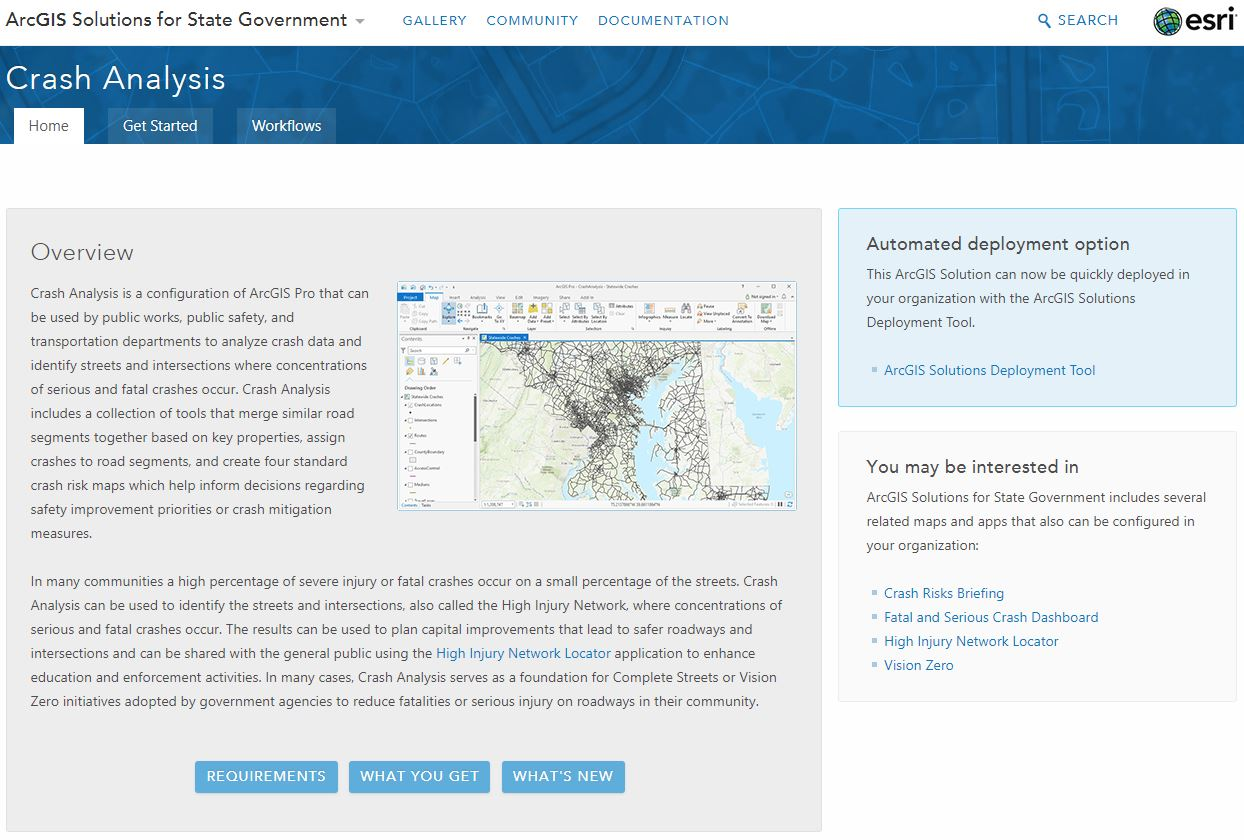

### Finding Statistically Significant Clustering of High Crash Rates Across Highways
**Abbreviated: Crash Rate Hot Spots Analysis**

Spatial Statistics tools can be useful when attempting to measure the spatial distribution of phenomena and quantify the significance of clustering in high or low observations. The approach evaluated in this analysis generates a dataset of evenly segmented interstate segments with calculated crash rates, where crash rate is defined as the amount of evaluated crashes divided by the traffic flow in the segment. The crash rate formula applied is provided by FHWA: https://safety.fhwa.dot.gov/local_rural/training/fhwasa1109/app_c.cfm

The goal of this analysis is to understand where a null hypothesis of random spatial distribution of crash rates can be proven false. In other words, we want to find where the clustering of high crash rate values in highway segments is statistically significant and worth further investigation. 

## <span style="color:Navy">Baseline: </span><span> FHWA Network Screening (Highway Safety Manual / usRAP) </span>

The bulk of this analysis was performed in ArcGIS Pro using the "Crash Analysis" ArcGIS Solution Template found at https://solutions.arcgis.com/local-government/help/crash-analysis/. Outputs of this analysis for Maryland interstates from 2010 through 2014 are loaded into this notebook as a point of comparison. 

Further information can be found here: https://solutions.arcgis.com/local-government/help/crash-analysis/workflows/create-risk-maps/

This analysis produced four output attributes that can be used to interpret how singificant accident issues are for each road segment. Let's start by visualizing the "Crash Rate Risk" which is derived from the crash rate for each segment: a calculation of the amount of accidents divided by the amount of traffic at each segment.  

In [73]:
fhwa_ns_map = gis.map("Maryland")
fhwa_ns_map.basemap = 'gray'
fhwa_ns_map

MapView(layout=Layout(height='400px', width='100%'))

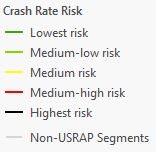

In [72]:
fhwa_ns_map.add_layer(analysisroads_interstatesmd_item)

The FHWA Network Screening workflow classified interstate road segments in Maryland as belonging to one of three classes with respect to crash rate risks:

- Lowest risk
- Medium-low risk
- Medium risk

Let's explore the distribution of the count of segments by each class through a simple plot. 

In [ ]:
fhwa_ns_sedf = pd.DataFrame.spatial.from_layer(analysisroads_interstatesmd_item.layers[0])
p = Bar(fhwa_ns_sedf, 'CRASH_RATE_RISK', title="Highway Segments by Crash Rate Risk")
show(p)

In [ ]:
fhwa_ns_sedf.CRASH_RATE.describe()

In [ ]:
crash_ratehist = Histogram(fhwa_ns_sedf.CRASH_RATE, bins=list(np.linspace(0,4,20)))
show(crash_ratehist)

For the baseline, let's focus on the segments that received the designation of "Medium risk". 

In [ ]:
baseline_areas_map = gis.map("Maryland")
baseline_areas_map.basemap = 'dark-gray'
baseline_areas_map

In [ ]:
fhwa_ns_sedf[fhwa_ns_sedf.CRASH_RATE_RISK == 'Medium risk'].spatial.plot(map_widget=baseline_areas_map)

These segments are broadly interpreted as locations that the FHWA Network Segmentation approach would designate as having more significant systemic problems that lead to fatal accidents than the rest of the interstate network in Maryland.

Our goal for the following two segments is to use spatial analysis techniques and examine the results in comparison to this baseline, then address recommendations and learned lessons for further iteration and refinement.

##### >>>> Section under construction: Loading of web maps for different risk maps from FHWA Network Screening baseline analysis

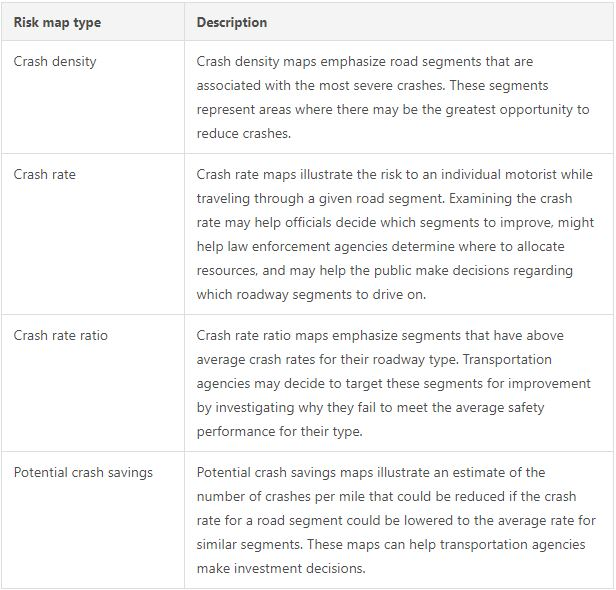

In [ ]:
webmaps = gis.content.search("Maryland Interstate Transportation Risk Map", item_type="Web Map")
webmaps

In [ ]:
for webmap in webmaps:
    display(webmap)

In [ ]:
print(webmaps[2].title)
WebMap(webmaps[2])

In [ ]:
print(webmaps[0].title)
WebMap(webmaps[0])

In [ ]:
print(webmaps[1].title)
WebMap(webmaps[1])

In [ ]:
print(webmaps[3].title)
WebMap(webmaps[3])

In [ ]:
# from ipywidgets import *

# WebMap(webmaps[3]).layout = Layout(flex='1 1', padding='6px')
# WebMap(webmaps[1]).layout = Layout(flex='1 1', padding='6px')
# box = HBox([WebMap(webmaps[3]), WebMap(webmaps[1])])
# box

## <span style="color:Navy">Analysis 1: </span><span> Defining, Finding, and Describing Spatial Clusters of Accident Events</span>

The first analytic that will be tested as a supplement for the FHWA Network Screening process is briefly referred to as the Density-based Clustering analysis, and is composed of four steps:

1. Define and find accident clusters
2. Measure spatial characteristics of each cluster
3. Measure aspatial characteristics of each cluster
4. Rank sites

This portion of the notebook contains the python code to run this analytic on the state of Maryland, and can be adapted to run for another region. 

### Step 1. Define and find accident clusters

A case is made that fatal accidents concentrated in a dense geographic region suggest the presence of a systemic problem. The concentration of events may be related to issues pertaining to the roadway characteristics or human factors(or both), but the leading effort is to find and compare these sites as part of supplemental network screening. 

This workflow suggests that the concept of spatial clustering of events can help identify these areas, and the use of the Density-based Clustering tool in ArcGIS is an effective method to find these locations.

![clustering](https://github.com/Qberto/arcgispythonapi_arcpy-spatial_statistics_examples/raw/5f8994ab80301d8ae145e9081b16c1389a5729d0/img/dbclustering_01.png "Density-based Clustering")

The [Density-based Clustering tool](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/how-density-based-clustering-works.htm) works by detecting areas where points are concentrated and where they are separated by areas that are empty or sparse. Points that are not part of a cluster are labeled as noise.

This tool uses unsupervised machine learning clustering algorithms which automatically detect patterns based purely on spatial location and the distance to a specified number of neighbors. These algorithms are considered unsupervised because they do not require any training on what it means to be a cluster.

#### Three clustering algorithms:

The Density-based Clustering tool provides three different Clustering Methods with which to find clusters in your point data:

- _Defined distance (DBSCAN)_ — Uses a specified distance to separate dense clusters from sparser noise. The DBSCAN algorithm is the fastest of the clustering methods, but is only appropriate if there is a very clear Search Distance to use, and that works well for all potential clusters. This requires that all meaningful clusters have similar densities.

- _Self-adjusting (HDBSCAN)_ — Uses a range of distances to separate clusters of varying densities from sparser noise. The HDBSCAN algorithm is the most data-driven of the clustering methods, and thus requires the least user input.

- _Multi-scale (OPTICS)_ — Uses the distance between neighboring features to create a reachability plot which is then used to separate clusters of varying densities from noise. The OPTICS algorithm offers the most flexibility in fine-tuning the clusters that are detected, though it is computationally intensive, particularly with a large Search Distance.

The definition of a cluster in this analysis and in each version of the workflow is an important step in the sequence, and this workflow attempts to leverage both data-driven and domain-driven reasons to define clusters. 

#### Data-driven: Using HDBSCAN to let the distribution of the events determine a cluster definition

In [ ]:
# Create a temporary file geodatabase on disk
workspace_fgdb = arcpy.CreateFileGDB_management(workspace_dir, "maryland_analysis").getOutput(0)

In [ ]:
# Save our input data into a temporary feature class on disk
crashes_fc = crashes_q_sedf.spatial.to_featureclass(os.path.join(workspace_fgdb, "crashes_fc"))

In [ ]:
# Run HDBSCAN 
output_path = "{0}//{1}_HDBSCAN".format(workspace_fgdb, "CrashClusters")
hdbscan_result = arcpy.stats.DensityBasedClustering(crashes_fc, output_path, "HDBSCAN", 5)
hdbscan_result

In [ ]:
hdbscan_result.getMessages()

In [ ]:
hdbscan_sedf = pd.DataFrame.spatial.from_featureclass(hdbscan_result.getOutput(0))
hdbscan_sedf.head()

In [ ]:
hdbscan_sedf.shape

In [ ]:
hdbscan_map = gis.map("Maryland")
hdbscan_map.basemap = 'gray'
hdbscan_map

In [ ]:
hdbscan_sedf.spatial.plot(map_widget=hdbscan_map, renderer_type='u', col='COLOR_ID')

In [ ]:
# Publish outputs to WebGIS to run summarize tools
interstatecrashes_item = gis.content.import_data(crashes_q_sedf)
interstatecrashes_item

In [ ]:
arcgis.find_point_clusters(interstatecrashes_item.layers[0], 5, output_name="hdbscan_accidents_04")

In [ ]:
hdbscan_clusters_item = gis.content.search("hdbscan_accidents_03", item_type="Feature Service")[0]
hdbscan_clusters_item

In [ ]:
clusters_map = gis.map("Maryland")
clusters_map

In [ ]:
clusters_map.add_layer(hdbscan_clusters_item)

In [ ]:
hdbscan_sedf

### Step 2. Measure spatial characteristics of each cluster

### Step 3. Measure aspatial characteristics of each cluster

### Step 4. Rank sites

## <span style="color:Navy">Analysis 2: </span><span> Finding Statistically Significant Clustering of High Crash Rate Values for Interstate Highway Segments</span>

< Description placeholder >

### Step 1. Prepare HPMS segments and Crash Points

### Step 2. Define neighborhood

### Step 3. Run Optimized Hot Spots

### Step 4. Rank Sites